In [15]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences









In [16]:
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')  # Update path if needed

In [17]:
# Encode labels: 'positive' -> 1, 'negative' -> 0
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [18]:
# Prepare input and output
X = df['review'].values
y = df['sentiment'].values

In [19]:
# Tokenization
vocab_size = 10000  # Only consider top 10k words
max_length = 200    # Maximum review length

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [22]:
# Build Deep Neural Network
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\ompak\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7360 - loss: 0.4905 - val_accuracy: 0.8711 - val_loss: 0.3051
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9605 - loss: 0.1153 - val_accuracy: 0.8383 - val_loss: 0.4370
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.8355 - val_loss: 0.6212
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9939 - loss: 0.0174 - val_accuracy: 0.8380 - val_loss: 0.7916
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9956 - loss: 0.0122 - val_accuracy: 0.8292 - val_loss: 0.8559
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.8369 - val_loss: 0.7902
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.8293 - val_loss: 0.9534
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9979 -

In [25]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.9902
Test Accuracy: 83.10%


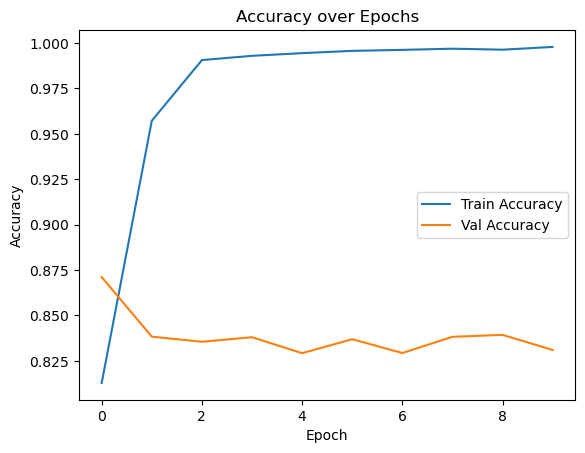

In [26]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()


In [27]:
# Take user input and predict sentiment
def predict_review(review_text):
    sequence = tokenizer.texts_to_sequences([review_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Predicted Sentiment: {sentiment}")

# Example usage
user_review = input("Enter a movie review: ")
predict_review(user_review)


Enter a movie review:  very good


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Sentiment: Positive


In [41]:
import requests

r=requests.get("https://raw.githubusercontent.com/DeveshMhaisne/lp5/main/dl_2.ipynb")

with open("dl_2.ipynb","wb")as file:
    file.write(r.content)